In [21]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root_path = '/projekt1/radar/webtool/'

In [13]:
ds_info = xr.open_dataset(f'{root_path}MR_wind_2021_01_07.h5', group = 'info')
ds_info['alt']

<xarray.DataArray 'alt' (phony_dim_0: 23, phony_dim_1: 1)>
array([[ 70.],
       [ 72.],
       [ 74.],
       [ 76.],
       [ 78.],
       [ 80.],
       [ 82.],
       [ 84.],
       [ 86.],
       [ 88.],
       [ 90.],
       [ 92.],
       [ 94.],
       [ 96.],
       [ 98.],
       [100.],
       [102.],
       [104.],
       [106.],
       [108.],
       [110.],
       [112.],
       [114.]])
Dimensions without coordinates: phony_dim_0, phony_dim_1
Attributes:
    altitude:  altitude / km

In [5]:
ds = xr.open_dataset(f'{root_path}MR_wind_2021_01_06.h5', group = 'wind')
ds

<xarray.Dataset>
Dimensions:  (phony_dim_7: 24, phony_dim_8: 23, phony_dim_9: 1)
Dimensions without coordinates: phony_dim_7, phony_dim_8, phony_dim_9
Data variables:
    u        (phony_dim_7, phony_dim_8) float64 ...
    u0       (phony_dim_8, phony_dim_9) float64 ...
    u_err    (phony_dim_7, phony_dim_8) float64 ...
    u_fil    (phony_dim_7, phony_dim_8) float64 ...
    v        (phony_dim_7, phony_dim_8) float64 ...
    v0       (phony_dim_8, phony_dim_9) float64 ...
    v_err    (phony_dim_7, phony_dim_8) float64 ...
    v_fil    (phony_dim_7, phony_dim_8) float64 ...
    w        (phony_dim_7, phony_dim_8) float64 ...
    w0       (phony_dim_8, phony_dim_9) float64 ...
    w_err    (phony_dim_7, phony_dim_8) float64 ...
    w_fil    (phony_dim_7, phony_dim_8) float64 ...

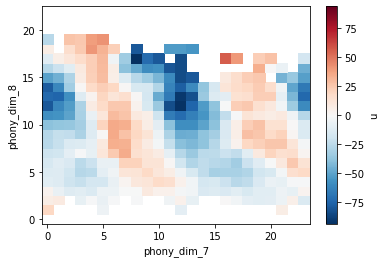

In [4]:
ds['u'].plot(y = 'phony_dim_8')

In [11]:
ds = xr.open_dataset(f'{root_path}MR_wind_2021_01_07.h5', group = 'tides')
ds

<xarray.Dataset>
Dimensions:  (phony_dim_5: 23, phony_dim_6: 1)
Dimensions without coordinates: phony_dim_5, phony_dim_6
Data variables:
    A12u     (phony_dim_5, phony_dim_6) float64 ...
    A12v     (phony_dim_5, phony_dim_6) float64 ...
    A24u     (phony_dim_5, phony_dim_6) float64 ...
    A24v     (phony_dim_5, phony_dim_6) float64 ...
    A8u      (phony_dim_5, phony_dim_6) float64 ...
    A8v      (phony_dim_5, phony_dim_6) float64 ...
    p12u     (phony_dim_5, phony_dim_6) float64 ...
    p12v     (phony_dim_5, phony_dim_6) float64 ...
    p24u     (phony_dim_5, phony_dim_6) float64 ...
    p24v     (phony_dim_5, phony_dim_6) float64 ...
    p8u      (phony_dim_5, phony_dim_6) float64 ...
    p8v      (phony_dim_5, phony_dim_6) float64 ...

In [51]:
ds = xr.open_mfdataset(f'{root_path}MR_wind_202*.h5', group = 'tides', 
                       parallel = True, concat_dim = 'phony_dim_6', 
                       combine='nested')
ds = ds.rename({'phony_dim_5': 'alt', 'phony_dim_6': 'time'})
ds['alt'] = ds_info['alt'].squeeze().values
ds['alt'].attrs['long_name'] = 'altitude'
ds['alt'].attrs['units'] = 'km'
ds['time'] = pd.date_range('2020-12-28', periods = ds.time.shape[0], freq = 'D')
ds

<xarray.Dataset>
Dimensions:  (alt: 23, time: 12)
Coordinates:
  * alt      (alt) float64 70.0 72.0 74.0 76.0 78.0 ... 108.0 110.0 112.0 114.0
  * time     (time) datetime64[ns] 2020-12-28 2020-12-29 ... 2021-01-08
Data variables:
    A12u     (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    A12v     (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    A24u     (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    A24v     (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    A8u      (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    A8v      (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    p12u     (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    p12v     (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    p24u     (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    p24v     (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    p8u      (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>
    p8v      (alt, time) float64 dask.array<chunksize=(23, 1), meta=np.ndarray>

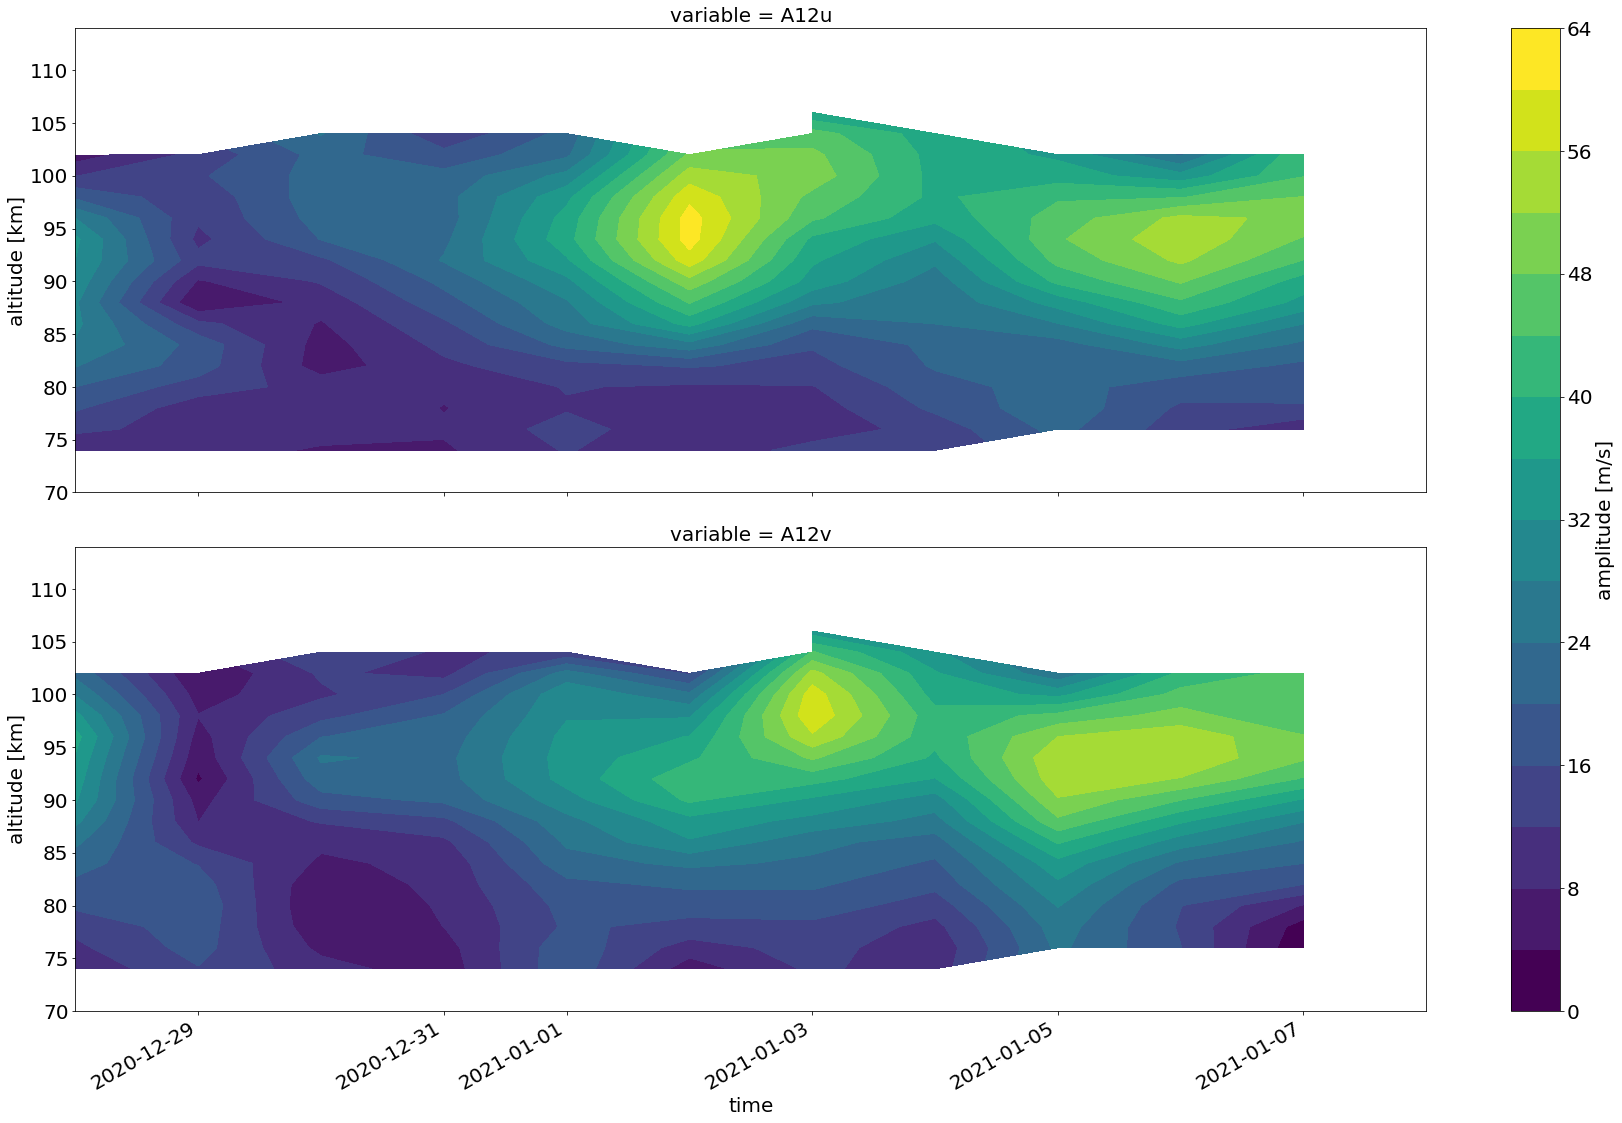

In [59]:
plt.rcParams.update({'font.size': 20})
cbar_dict = dict(label = 'amplitude [m/s]')
ds[['A12u','A12v']].to_array().plot.contourf(x = 'time', row = 'variable', 
                                             levels = 21, size = 8, aspect = 3,
                                             cbar_kwargs = cbar_dict)
plt.savefig('tides.png', dpi = 300, bbox_inches='tight')